In [4]:
import numpy as np
import matplotlib.pyplot as plt

## 1-الف) Mexican Hat

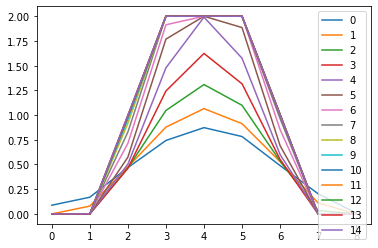

In [66]:
x = np.array([0.24, 0.3, 0.45, 0.57, 0.8, 0.69, 0.42, 0.26, 0.14])

def f(x):
    if x < 0:
        return 0
    elif x >= 0 and x < 2:
        return x
    elif x >= 2:
        return 2


def cooperative_nodes_sum(i, a):
    result = 0
    for j in range(1,R1+1):
        if(i-j>0):
            result +=  a[i-j]
        if(i+j<len(a)):
            result += a[i+j]

    return result

def competitive_nodes_sum(i, a):
    result = 0
    for k in range(R1+1,R2+1):
        if(i-k>0):
            result += a[i-k]
        if(i+k<len(a)):
            result += a[i+k]

    return result
    
a = np.copy(x)
t_max = 15

c1 = 0.5
c2 = -0.1

R1 = 1
R2 = 4

def mexican_hat():
    for t in range(t_max):
        a_old = np.copy(a)
        for i in range(len(a)):
            result = c1*a_old[i] + c1*cooperative_nodes_sum(i, a_old) + c2*competitive_nodes_sum(i, a_old)
            a[i] = f(result)
        
        plt.plot(a, label=t)

mexican_hat()

## 1-ب) Maxnet with Mexican Hat

[0.         0.         0.         0.         0.28581571 0.
 0.         0.         0.        ]


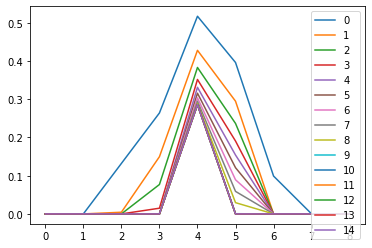

In [67]:
a = np.copy(x)
t_max = 15

c1 = 1
c2 = -0.1

R1 = 0
R2 = 9

mexican_hat()
print(a)

## ۲-ب) Hamming net

In [81]:
def max_net(ys):

    def f(x):
        if x>=0:
            return x
        else:
            return 0
    eps = (1.0 / (len(ys) - 1))

    W = np.full((len(ys), len(ys)), -eps)
    np.fill_diagonal(W, 1)

    a = np.copy(ys)

    for iteration in range(1000):
        a_old = np.copy(a)

        a_new = W @ a_old
        for i in range(len(a)):
            a[i] = f(a_new[i])

        if np.count_nonzero(a) == 1:
            break

    return np.where(a != 0)[0][0] 

assert max_net(np.array([2, 1, 4, 2, 5, 3])) == 4

In [90]:
e = np.array([[1, -1, 1, -1, -1, -1],
              [-1, 1, -1, 1, 1, -1],
              [-1, -1, 1, 1, -1, 1],
              [1, 1, -1, 1, 1, -1]])


V = np.array([[-1, -1, 1, -1, 1, -1],
              [1, 1, 1, 1, -1, -1],
              [-1, -1, -1, 1, 1, -1],
              [1, -1, 1, 1, -1, 1],
              [1, 1, 1, -1, -1, -1],
              [1, -1, -1, 1, 1, 1],
              [-1, 1, -1, -1, -1, 1]])


W = e.T / 2

b = np.full(W.shape[1], W.shape[0]/2)

for i, v in enumerate(V):
    ys = v @ W + b
    result = max_net(ys)
    print('y nodes are: ', ys)
    print(f'most similar vector to v{i+1} is e{result+1} found by maxnet')
    print()

y nodes are:  [4. 3. 3. 2.]
most similar vector to v1 is e1 found by maxnet

y nodes are:  [4. 3. 3. 4.]
most similar vector to v2 is e1 found by maxnet

y nodes are:  [2. 5. 3. 4.]
most similar vector to v3 is e2 found by maxnet

y nodes are:  [4. 1. 5. 2.]
most similar vector to v4 is e3 found by maxnet

y nodes are:  [5. 2. 2. 3.]
most similar vector to v5 is e1 found by maxnet

y nodes are:  [2. 3. 3. 4.]
most similar vector to v6 is e4 found by maxnet

y nodes are:  [2. 3. 3. 2.]
most similar vector to v7 is e2 found by maxnet



array([[ 0.5, -0.5, -0.5,  0.5],
       [-0.5,  0.5, -0.5,  0.5],
       [ 0.5, -0.5,  0.5, -0.5],
       [-0.5,  0.5,  0.5,  0.5],
       [-0.5,  0.5, -0.5,  0.5],
       [-0.5, -0.5,  0.5, -0.5]])